<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #245dd8; color: #FFFFFF;">
    <h1>Statistics II Activity 3 </h1>
</div>


<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Monte Carlo Simulation of rolling two six faced Die  </h1>
</div>

<p align="center">
    <img src="https://raw.githubusercontent.com/pk1308/Activity-2--stat-2/main/Activity3/basic_statsprob_graphik_1.png" alt="Image">
</p>


<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Import Packages
 </h1>
</div>

In [1]:
from random import randint
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.precision', 2)
import plotly.graph_objects as go
from PIL import Image
from IPython.display import display



<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Driver codes 
 </h1>
</div>

In [2]:


def roll_die():
    """
    Simulate rolling a fair six-sided die.

    Returns:
        int: A random integer between 1 and 6, inclusive.
    """
    return randint(1, 6)


def simulate_rolls(num_simulations, no_of_die=1, operation=""):
    """
    Simulate rolling one or two dice multiple times and perform an operation on the results.

    Args:
        num_simulations (int): The number of times to roll the dice.
        no_of_die (int, optional): The number of dice to roll. Defaults to 1.
        operation (str, optional): The operation to perform on the results ("sum", "max", "min"). Defaults to "".

    Returns:
        Counter: A Counter object containing the frequency of each result.
    """
    if no_of_die == 1:
        rolls = [roll_die() for _ in range(num_simulations)]

    
    if operation == "sum":
        rolls = [randint(1, 6) + randint(1, 6) for _ in range(num_simulations)]
    elif operation == "max":
        rolls = [max(randint(1, 6) , randint(1, 6)) for _ in range(num_simulations)]
    elif operation == "min":
        rolls = [min(randint(1, 6) , randint(1, 6)) for _ in range(num_simulations)]
    
    return Counter(rolls)

def calculate_probabilities(rolls, num_simulations):
    """
    Calculate the probabilities of each roll outcome.

    Args:
        rolls (dict): A dictionary of roll outcomes and their frequencies.
        num_simulations (int): The total number of simulations.

    Returns:
        dict: A dictionary of roll outcomes and their probabilities.
    """
    probabilities = {key: value / num_simulations for key, value in rolls.items()}
    return probabilities
import pandas as pd

def run_experiment(num_simulations_list, actual_probabilities, sample_space , operation="", no_of_die=1 ):
    """
    Run an experiment of rolling dice multiple times for different numbers of simulations.

    Args:
        num_simulations_list (list): A list of the number of simulations to run.
        operation (str, optional): The operation to perform on the results ("sum", "max", "min"). Defaults to "".
        no_of_die (int, optional): The number of dice to roll. Defaults to 1.

    Returns:
        DataFrame: A pandas DataFrame containing the theoretical and experimental probabilities for each roll outcome.
    """
    # Prepare an empty DataFrame to store the probabilities
    data = dict()

    for num_simulations in num_simulations_list:
        # Simulate rolls
        rolls = simulate_rolls(num_simulations, no_of_die, operation)

        # Calculate experimental probabilities
        probabilities = calculate_probabilities(rolls, num_simulations)

        data[f'Experimental Probability_{num_simulations}'] =  {roll: probabilities.get(roll, 0) for roll in sample_space}
    df = pd.DataFrame(data)
    df = df.sort_index()

    df["Theoretical Probabilities"] = actual_probabilities

    # Reorder columns
    cols = ['Theoretical Probabilities'] + [col for col in df if col != 'Theoretical Probabilities']
    df = df[cols]

    return df


In [3]:
def plot_df(df, num_simulations_list, title, x_title):
    """
    Plot a DataFrame of experimental probabilities against theoretical probabilities.

    Args:
        df (DataFrame): The DataFrame containing the probabilities.
        num_simulations_list (list): The list of numbers of simulations.
        title (str): The title of the plot.
        x_title (str): The title of the x-axis.

    Returns:
        None
    """
    # Convert the 'Theoretical Probabilities' column to a dictionary
    actual_probabilities = df['Theoretical Probabilities'].to_dict()

    # Initialize a new figure
    fig = go.Figure()

    # Convert the keys of 'actual_probabilities' to a list
    sample_space = list(actual_probabilities.keys())

    # Add a bar trace to the figure for each number of simulations
    for num_simulations in num_simulations_list:
        fig.add_trace(go.Bar(
            x=sample_space,
            y=df[f'Experimental Probability_{num_simulations}'],
            name=f'{num_simulations} Simulations',
            width=0.2,
            offset=num_simulations_list.index(num_simulations) * 0.2
        ))

    # Add a scatter trace to the figure for the theoretical probabilities
    fig.add_trace(go.Scatter(
        x=sample_space,
        y=list(actual_probabilities.values()),
        mode='lines+markers',
        name='Theoretical Probabilities',
        line=dict(color='red')
    ))

    # Update the layout of the figure
    fig.update_layout(
        title=title,
        xaxis=dict(title=x_title, tickmode='linear'),
        yaxis_title='Probability',
        barmode='group'
    )

    # Display the figure
    # fig.show()

    # Save the figure as a PNG image
    fig.write_image(f"{title}.png")


<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Monte Carlo Simulation of rolling six faced Fair Die  </h1>
</div>

# Experiment 1  - Rolling A fair die


## Simulating One Fair Die Roll and Experimental Probabilities

### Objective
The goal of this code is to simulate rolling a fair six-sided die and calculate experimental probabilities for each outcome.

**Sample Space**:
- When we roll a fair die, the sample space consists of all possible outcomes. Since the die has six faces, the sample space is: {1, 2, 3, 4, 5, 6}.



**Probabilities**:
- We assign probabilities to each outcome. Since the die is fair, each number occurs with equal likelihood. Therefore:
    - The probability follows a **uniform distribution**   $$P(T) = \frac{1}{6} $$.






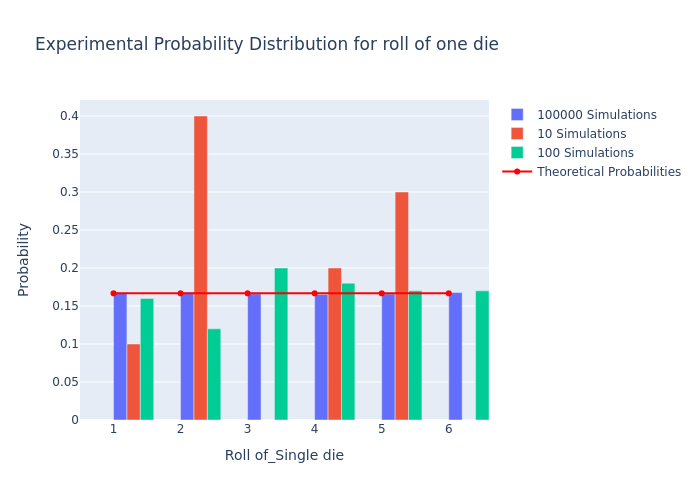

,Theoretical Probabilities,Experimental Probability_100000,Experimental Probability_10,Experimental Probability_100
1,0.17,0.17,0.1,0.16
2,0.17,0.17,0.4,0.12
3,0.17,0.17,0.0,0.20
4,0.17,0.17,0.2,0.18
5,0.17,0.17,0.3,0.17
6,0.17,0.17,0.0,0.17


In [4]:

sample_space = range(1,7)
# Actual probabilities (since it's a fair die)
actual_probabilities = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Number of simulations
num_simulations_list = [ 100000 , 10, 100]

# run the experiment 
df = run_experiment(num_simulations_list=num_simulations_list, actual_probabilities=actual_probabilities ,sample_space=sample_space)
title='Experimental Probability Distribution for roll of one die '
x_title = "Roll of_Single die"
plot_df(df=df , num_simulations_list=num_simulations_list ,title=title, x_title=x_title)
pil_im = Image.open(f"./{title}.png")
display(pil_im)
df

Based on the  experimental probabilities for rolling a fair six-sided die, we can summarize the results as follows:

1. **Theoretical Probabilities**: Theoretical probabilities are the expected probabilities for each outcome when rolling a fair six-sided die. Since the die is fair, each number has a probability of 1/6 or approximately 0.17.

2. **Experimental Probabilities**:
   - **Experimental Probability_100000**: These are the experimental probabilities calculated after simulating 100,000 die rolls.
   - **Experimental Probability_10**: These are the experimental probabilities calculated after simulating 10 die rolls.
   - **Experimental Probability_100**: These are the experimental probabilities calculated after simulating 100 die rolls.

3. **Summary of Results**:
   - The experimental probabilities generally approach the theoretical probabilities as the number of simulations increases.
   - With only 10 simulations, the experimental probabilities may vary significantly from the theoretical probabilities due to the limited sample size.
   - As the number of simulations increases (to 100 and 100,000 in this case), the experimental probabilities tend to converge towards the theoretical probabilities.
   - However, there may still be some variation due to random chance, especially with a smaller number of simulations.

Overall, the experimental results demonstrate the concept of probability convergence as the number of trials increases, approaching the expected theoretical probabilities.

<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Monte Carlo Simulation of rolling sum of two  six faced Fair Die  </h1>
</div>

## Simulating Two Fair Dice Rolls and Experimental Probabilities

### Objective
The objective of this code is to simulate rolling two fair six-sided dice and calculate experimental probabilities for each possible sum of the two dice.

### Sample Space
When rolling two fair dice, the sample space consists of all possible sums of their outcomes, ranging from 2 to 12.

### Probabilities
- The theoretical probabilities for each sum of two dice follow a triangular distribution:
- Sum of 2: 1 way to roll (1 + 1) - Probability: \(1/36\)
- Sum of 3: 2 ways to roll (1 + 2, 2 + 1) - Probability: \(2/36\)
- Sum of 4: 3 ways to roll (1 + 3, 2 + 2, 3 + 1) - Probability: \(3/36\)
- Sum of 5: 4 ways to roll (1 + 4, 2 + 3, 3 + 2, 4 + 1) - Probability: \(4/36\)
- Sum of 6: 5 ways to roll (1 + 5, 2 + 4, 3 + 3, 4 + 2, 5 + 1) - Probability: \(5/36\)
- Sum of 7: 6 ways to roll (1 + 6, 2 + 5, 3 + 4, 4 + 3, 5 + 2, 6 + 1) - Probability: \(6/36\)
- Sum of 8: 5 ways to roll (2 + 6, 3 + 5, 4 + 4, 5 + 3, 6 + 2) - Probability: \(5/36\)
- Sum of 9: 4 ways to roll (3 + 6, 4 + 5, 5 + 4, 6 + 3) - Probability: \(4/36\)
- Sum of 10: 3 ways to roll (4 + 6, 5 + 5, 6 + 4) - Probability: \(3/36\)
- Sum of 11: 2 ways to roll (5 + 6, 6 + 5) - Probability: \(2/36\)
- Sum of 12: 1 way to roll (6 + 6) - Probability: \(1/36\)




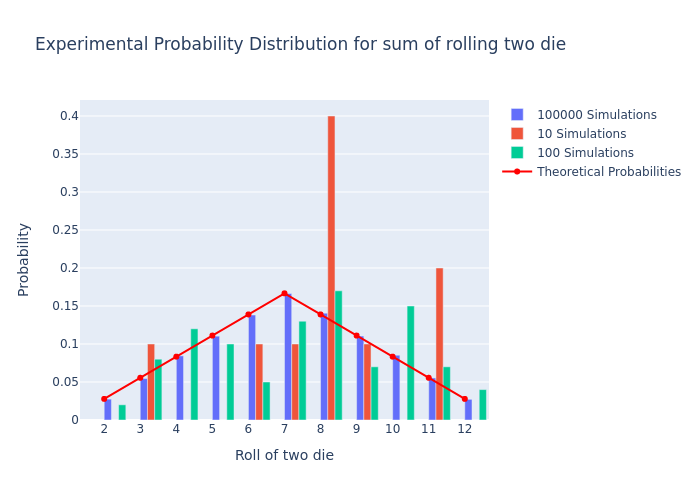

,Theoretical Probabilities,Experimental Probability_100000,Experimental Probability_10,Experimental Probability_100
2,0.03,0.03,0.0,0.02
3,0.06,0.05,0.1,0.08
4,0.08,0.08,0.0,0.12
5,0.11,0.11,0.0,0.10
6,0.14,0.14,0.1,0.05
7,0.17,0.17,0.1,0.13
8,0.14,0.14,0.4,0.17
9,0.11,0.11,0.1,0.07
10,0.08,0.09,0.0,0.15
11,0.06,0.06,0.2,0.07


In [5]:
sample_space = range(2,13)
# Actual probabilities (since it's the sum of two fair six-sided dice)
actual_probabilities = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]

# Number of simulations
num_simulations_list = [ 100000 , 10, 100]
operation='sum' 
no_of_die=2

# run the experiment 
df = run_experiment(num_simulations_list=num_simulations_list, actual_probabilities=actual_probabilities ,operation="sum" , no_of_die=2 ,sample_space=sample_space)
title='Experimental Probability Distribution for sum of rolling two die '
x_title = "Roll of two die"
plot_df(df=df , num_simulations_list=num_simulations_list ,title=title, x_title=x_title)
plot_df(df=df , num_simulations_list=num_simulations_list ,title=title, x_title=x_title)
pil_im = Image.open(f"./{title}.png")
display(pil_im)
df


Based on the  experimental probabilities  for simulating two fair six-sided dice rolls, we can summarize the results as follows:

1. **Theoretical Probabilities**: These are the expected probabilities for each possible sum of two dice rolls based on the given distribution.

2. **Experimental Probabilities**:
   - **Experimental Probability_100000**: These are the experimental probabilities calculated after simulating 100,000 rolls of two dice.
   - **Experimental Probability_10**: These are the experimental probabilities calculated after simulating 10 rolls of two dice.
   - **Experimental Probability_100**: These are the experimental probabilities calculated after simulating 100 rolls of two dice.

3. **Summary of Results**:
   - The experimental probabilities tend to approach the theoretical probabilities as the number of simulations increases.
   - With a smaller number of simulations (10 in this case), the experimental probabilities may deviate significantly from the theoretical probabilities due to the limited sample size.
   - As the number of simulations increases (to 100 and 100,000 in this case), the experimental probabilities tend to converge towards the theoretical probabilities.
   - However, there may still be some variation due to random chance, especially with a smaller number of simulations.

4. **Observations**:
   - The experimental probabilities for sums closer to 7 (such as 6, 7, and 8) tend to be more accurate with a smaller number of simulations compared to sums farther away from 7 (such as 2 and 12).
   - As expected, the experimental probabilities for sums with fewer possible combinations (such as 2 and 12) have more variability and are less accurate with a smaller number of simulations.

Overall, the experimental results demonstrate the concept of probability convergence as the number of trials increases, approaching the expected theoretical probabilities. However, some variation is expected due to the random nature of the dice rolls.

<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Monte Carlo Simulation of max rolling two  six faced Fair Die  </h1>
</div>

## Simulating the Maximum Outcome of Two Fair Dice Rolls

### Objective
The objective of this simulation is to roll two fair six-sided dice and calculate the experimental probabilities for the maximum outcome of the two dice.

### Sample Space
The sample space consists of all possible outcomes, ranging from 1 to 6 for each die.

### Probabilities
The theoretical probabilities for the maximum outcome of two fair dice are:

- Max Outcome of 1: Probability = $\frac{1}{36}$
- Max Outcome of 2: Probability = $\frac{3}{36}$
- Max Outcome of 3: Probability = $\frac{5}{36}$
- Max Outcome of 4: Probability = $\frac{7}{36}$
- Max Outcome of 5: Probability = $\frac{9}{36}$
- Max Outcome of 6: Probability = $\frac{11}{36}$



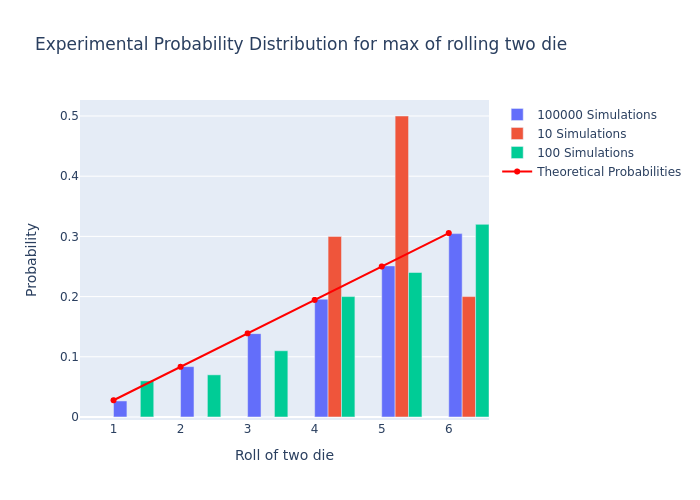

,Theoretical Probabilities,Experimental Probability_100000,Experimental Probability_10,Experimental Probability_100
1,0.03,0.03,0.0,0.06
2,0.08,0.08,0.0,0.07
3,0.14,0.14,0.0,0.11
4,0.19,0.20,0.3,0.20
5,0.25,0.25,0.5,0.24
6,0.31,0.30,0.2,0.32


In [6]:
sample_space = range(1,7)
# Actual probabilities (since it's the sum of two fair six-sided dice)
actual_probabilities = [1/36, 3/36, 5/36, 7/36, 9/36, 11/36]

# Number of simulations
num_simulations_list = [ 100000 , 10, 100]
operation='max' 
no_of_die=2

# run the experiment 
df = run_experiment(num_simulations_list=num_simulations_list, actual_probabilities=actual_probabilities ,operation=operation , no_of_die=2 ,sample_space=sample_space)
title='Experimental Probability Distribution for max of rolling two die '
x_title = "Roll of two die"
plot_df(df=df , num_simulations_list=num_simulations_list ,title=title, x_title=x_title)
plot_df(df=df , num_simulations_list=num_simulations_list ,title=title, x_title=x_title)
pil_im = Image.open(f"./{title}.png")
display(pil_im)
df

Based on the  experimental probabilities for simulating the maximum outcome of two fair six-sided dice rolls, we can summarize the results as follows:

1. **Theoretical Probabilities**: These are the expected probabilities for each possible maximum outcome of two dice rolls based on the given distribution.

2. **Experimental Probabilities**:
   - **Experimental Probability_100000**: These are the experimental probabilities calculated after simulating 100,000 rolls of two dice.
   - **Experimental Probability_10**: These are the experimental probabilities calculated after simulating 10 rolls of two dice.
   - **Experimental Probability_100**: These are the experimental probabilities calculated after simulating 100 rolls of two dice.

3. **Summary of Results**:
   - The experimental probabilities tend to approach the theoretical probabilities as the number of simulations increases.
   - With a smaller number of simulations (10 in this case), the experimental probabilities may deviate significantly from the theoretical probabilities due to the limited sample size.
   - As the number of simulations increases (to 100 and 100,000 in this case), the experimental probabilities tend to converge towards the theoretical probabilities.
   - However, there may still be some variation due to random chance, especially with a smaller number of simulations.

4. **Observations**:
   - The experimental probabilities for higher maximum outcomes (such as 5 and 6) tend to be more accurate with a smaller number of simulations compared to lower maximum outcomes (such as 1 and 2).
   - As expected, the experimental probabilities for maximum outcomes with fewer possible combinations (such as 1) have more variability and are less accurate with a smaller number of simulations.

Overall, the experimental results demonstrate the concept of probability convergence as the number of trials increases, approaching the expected theoretical probabilities. However, some variation is expected due to the random nature of the dice rolls.

<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Monte Carlo Simulation of Min rolling two six faced Fair Die  </h1>
</div>

## Simulating the Minimum Outcome of Two Fair Dice

### Objective
The objective of this simulation is to roll two fair six-sided dice and calculate the experimental probabilities for the minimum outcome of the two dice.

### Sample Space
The sample space consists of all possible outcomes, ranging from 1 to 6 for each die.

### Probabilities
The theoretical probabilities for the minimum outcome of two fair dice are:

- Min Outcome of 1: Probability = $\frac{11}{36}$
- Min Outcome of 2: Probability = $\frac{9}{36}$
- Min Outcome of 3: Probability = $\frac{7}{36}$
- Min Outcome of 4: Probability = $\frac{5}{36}$
- Min Outcome of 5: Probability = $\frac{3}{36}$
- Min Outcome of 6: Probability = $\frac{1}{36}$


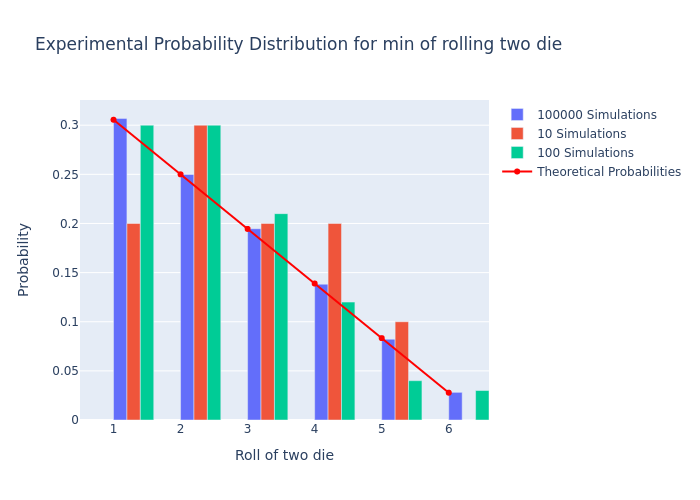

,Theoretical Probabilities,Experimental Probability_100000,Experimental Probability_10,Experimental Probability_100
1,0.31,0.31,0.2,0.30
2,0.25,0.25,0.3,0.30
3,0.19,0.19,0.2,0.21
4,0.14,0.14,0.2,0.12
5,0.08,0.08,0.1,0.04
6,0.03,0.03,0.0,0.03


In [7]:
sample_space = range(1,7)
# Actual probabilities (since it's the sum of two fair six-sided dice)
actual_probabilities = [11/36, 9/36, 7/36, 5/36, 3/36, 1/36]

# Number of simulations
num_simulations_list = [ 100000 , 10, 100]
operation='min' 
no_of_die=2

# run the experiment 
df = run_experiment(num_simulations_list=num_simulations_list, actual_probabilities=actual_probabilities ,operation=operation , no_of_die=2 ,sample_space=sample_space)
title='Experimental Probability Distribution for min of rolling two die '
x_title = "Roll of two die"
plot_df(df=df , num_simulations_list=num_simulations_list ,title=title, x_title=x_title)
plot_df(df=df , num_simulations_list=num_simulations_list ,title=title, x_title=x_title)
pil_im = Image.open(f"./{title}.png")
display(pil_im)
df

Based on the  experimental probabilities for simulating the minimum outcome of two fair six-sided dice rolls, we can summarize the results as follows:

1. **Theoretical Probabilities**: These are the expected probabilities for each possible minimum outcome of two dice rolls based on the given distribution.

2. **Experimental Probabilities**:
   - **Experimental Probability_100000**: These are the experimental probabilities calculated after simulating 100,000 rolls of two dice.
   - **Experimental Probability_10**: These are the experimental probabilities calculated after simulating 10 rolls of two dice.
   - **Experimental Probability_100**: These are the experimental probabilities calculated after simulating 100 rolls of two dice.

3. **Summary of Results**:
   - The experimental probabilities tend to approach the theoretical probabilities as the number of simulations increases.
   - With a smaller number of simulations (10 in this case), the experimental probabilities may deviate significantly from the theoretical probabilities due to the limited sample size.
   - As the number of simulations increases (to 100 and 100,000 in this case), the experimental probabilities tend to converge towards the theoretical probabilities.
   - However, there may still be some variation due to random chance, especially with a smaller number of simulations.

4. **Observations**:
   - The experimental probabilities for higher minimum outcomes (such as 1 and 2) tend to be more accurate with a smaller number of simulations compared to lower minimum outcomes (such as 5 and 6).
   - As expected, the experimental probabilities for minimum outcomes with fewer possible combinations (such as 5 and 6) have more variability and are less accurate with a smaller number of simulations.

Overall, the experimental results demonstrate the concept of probability convergence as the number of trials increases, approaching the expected theoretical probabilities. However, some variation is expected due to the random nature of the dice rolls.